In [2]:
from scipy.io import loadmat, whosmat
import numpy as np
import matplotlib.pyplot as plt
import datetime
import json
import os
import pandas as pd

from google.colab import drive

In [3]:
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

In [4]:
cd '/content/drive/My Drive/Battery'

/content/drive/My Drive/Battery


#기본 설정
 - My Drive 위치에서 Battery 폴더 생성
 - Battery 폴더에서 'Source', 'JSON', 'CSV' 3개의 하위 폴더 생성
 - ipynb 파일을 Battery 폴더에 복사 후 실행

In [ ]:
df_charge = pd.DataFrame()
df_discharge = pd.DataFrame()

load_folder = './Source' 
json_foler = './JSON/'
csv_foler = './CSV/'

#Build dictionaries from data structures¶

In [5]:
def build_dictionaries(mess):

    discharge, charge, impedance = {}, {}, {}

    for i, element in enumerate(mess):

        step = element[0][0]

        if step == 'discharge':
            discharge[str(i)] = {}
            discharge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            discharge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            discharge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            discharge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            discharge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            discharge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            discharge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            discharge[str(i)]["time"] = data[0][0][5][0].tolist()

        if step == 'charge':
            charge[str(i)] = {}
            charge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            charge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            charge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            charge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            charge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            charge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            charge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            charge[str(i)]["time"] = data[0][0][5][0].tolist()

        if step == 'impedance':
            impedance[str(i)] = {}
            impedance[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            impedance[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            impedance[str(i)]["sense_current"] = {}
            impedance[str(i)]["battery_current"] = {}
            impedance[str(i)]["current_ratio"] = {}
            impedance[str(i)]["battery_impedance"] = {}
            impedance[str(i)]["rectified_impedance"] = {}

            impedance[str(i)]["sense_current"]["real"] = np.real(data[0][0][0][0]).tolist()
            impedance[str(i)]["sense_current"]["imag"] = np.imag(data[0][0][0][0]).tolist()

            impedance[str(i)]["battery_current"]["real"] = np.real(data[0][0][1][0]).tolist()
            impedance[str(i)]["battery_current"]["imag"] = np.imag(data[0][0][1][0]).tolist()

            impedance[str(i)]["current_ratio"]["real"] = np.real(data[0][0][2][0]).tolist()
            impedance[str(i)]["current_ratio"]["imag"] = np.imag(data[0][0][2][0]).tolist()

            impedance[str(i)]["battery_impedance"]["real"] = np.real(data[0][0][3]).tolist()
            impedance[str(i)]["battery_impedance"]["imag"] = np.imag(data[0][0][3]).tolist()

            impedance[str(i)]["rectified_impedance"]["real"] = np.real(data[0][0][4]).tolist()
            impedance[str(i)]["rectified_impedance"]["imag"] = np.imag(data[0][0][4]).tolist()

            impedance[str(i)]["re"] = float(data[0][0][5][0][0])
            impedance[str(i)]["rct"] = float(data[0][0][6][0][0])
            
    return discharge, charge, impedance

#Save as json

In [6]:
def save_json(dictionary, name):
    with open(name + '.json', 'w') as f:
        json.dump(dictionary, f, indent=4)

#Save as CSV

In [34]:
def save_csv(df, name):
  df.to_csv(csv_foler + name + ".csv", mode='w')

#Feature Extraction

In [7]:
def extract_feature(filename, target):
  df = pd.DataFrame()

  for key in target.keys():
    df_cycle = pd.DataFrame()
    df_cycle['voltage_battery'] = target[key]['voltage_battery']
    df_cycle['current_battery'] = target[key]['current_battery']
    df_cycle['temp_battery'] = target[key]['temp_battery']
    df_cycle['current_load'] = target[key]['current_load']
    df_cycle['voltage_load'] = target[key]['voltage_load']
    df_cycle['time'] = target[key]['time']  
    df_cycle['cycle'] = key 
    df_cycle['battery'] = filename

    df = df.append(df_cycle)

  return df

In [32]:
filenames = [f for f in os.listdir(load_folder) if f.endswith('.mat')]

for filename in filenames:
    name = filename.split('.mat')[0]
    print(name)
    struct = loadmat(load_folder + '/' + filename)
    mess = struct[name][0][0][0][0]
    
    discharge, charge, impedance = build_dictionaries(mess)

    df_discharge = df_discharge.append(extract_feature(name, discharge))
    df_charge = df_charge.append(extract_feature(name, charge))

    # -------- mat-->json 저장 -------- #
    #save_json(discharge, json_foler + name + '_discharge')
    #save_json(charge, json_foler + name + '_charge')    
    #save_json(impedance, json_foler + name + '_impedance')    

B0005
B0006
B0007
B0018


#Voltage Plot

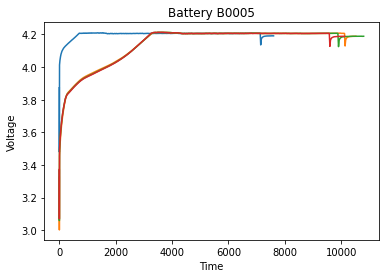

In [28]:
battery_name = 'B0005'
cycle_list = ['0','2','10','20','60', '220']

for cycle in cycle_list:
  df_tmp = df_charge[(df_charge.battery == battery_name) & (df_charge.cycle == cycle)]
  plt.plot(df_tmp.time, df_tmp.voltage_battery)

plt.ylabel('Voltage')
plt.xlabel('Time')
plt.title('Battery B0005')
plt.show()

#Current Plot

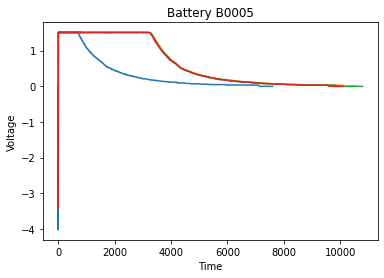

In [29]:
battery_name = 'B0005'
cycle_list = ['0','2','10','20','60', '220']

for cycle in cycle_list:
  df_tmp = df_charge[(df_charge.battery == battery_name) & (df_charge.cycle == cycle)]
  plt.plot(df_tmp.time, df_tmp.current_battery)

plt.ylabel('Current')
plt.xlabel('Time')
plt.title('Battery B0005')
plt.show()

#Temperature Plot

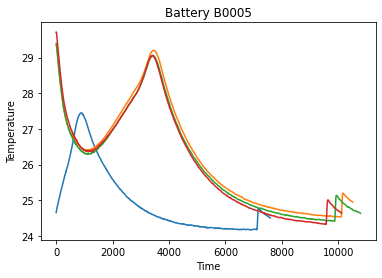

In [30]:
battery_name = 'B0005'
cycle_list = ['0','2','10','20','60', '220']

for cycle in cycle_list:
  df_tmp = df_charge[(df_charge.battery == battery_name) & (df_charge.cycle == cycle)]
  plt.plot(df_tmp.time, df_tmp.temp_battery)

plt.ylabel('Temperature')
plt.xlabel('Time')
plt.title('Battery B0005')
plt.show()

#Save CSV

In [35]:
save_csv(df_charge, 'charge')
save_csv(df_discharge, 'discharge')

#Read .json file in to python

In [74]:
with open('./JSON/B0005_impedance.json') as f:    
    impedance_data = json.load(f)
    
with open('./JSON/B0005_discharge.json') as f:    
    discharge_data = json.load(f)

with open('./JSON/B0005_charge.json') as f:    
    charge_data = json.load(f)    